In [129]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [130]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [131]:
''' Stage Size: Load data from file. '''
csv_path = './1_performance/speedup_GAP.csv'
workload_list = ['bc road', 'cc road', 'pr road', 'bc twi', 'cc twi', 'pr twi', 'bc web', 'cc web', 'pr web', 'Geomean']
scheme_list = ['SILC-FM', 'Baryon over SILC-FM', 'NA', 'Hybrid2', 'Baryon-High over Hybrid2']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

stagesize_title = 'Normalized Performance'
fig_name = 'graph_perf_GAP'
stagesize_ylim = (0, 2.4)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.4))
hybrid2_color = '#fb9a99'
silcfm_color = easypyplot.color.COLOR_SET[5]
baryon_color = easypyplot.color.COLOR_SET[3]
baryon_high_color = easypyplot.color.COLOR_SET[0]
stagesize_bar_colors = [silcfm_color, baryon_color, '#000000', hybrid2_color, baryon_high_color]
assert len(stagesize_bar_colors) == len(scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        row_value.insert(2, 0)
        stagesize_data_2darr.append(row_value)
        stagesize_xlabels.append(workload_fullname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

[[1, 1.26, 0, 1, 1.2],
 [1, 1.82, 0, 1, 1.21],
 [1, 1.73, 0, 1, 1.09],
 [1, 2.34, 0, 1, 1.22],
 [1, 1.71, 0, 1, 1.12],
 [1, 1.51, 0, 1, 1.17],
 [1, 1.52, 0, 1, 1.02],
 [1, 1.86, 0, 1, 1.01],
 [1, 2.2, 0, 1, 1.0],
 [1, 1.6930107269999999, 0, 1, 1.12771414]]


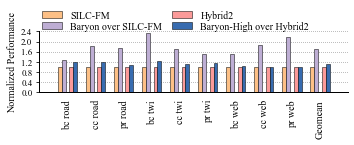

In [132]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1, 1, 1)
# stagesize_ax2 = stagesize_ax.twinx()
# easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    prop=ft,
    colors=stagesize_bar_colors)
stagesize_h2 = []
# easypyplot.format.turn_off_box(ax2)
# for group_id in range(len(workload_dict)):
#     # layout_xticks = list(np.arange(fig_xticks[group_id] - 1/3))
#     gap = 1./3 - 1.0 * fig_bar_width / 6
#     layout_xticks = [stagesize_xticks[group_id] - gap, stagesize_xticks[group_id], stagesize_xticks[group_id] + gap]
#     print(layout_xticks)
#     stagesize_h2 += stagesize_ax2.plot(layout_xticks, layout_data_2darr[group_id],
#                 marker='*',
#                 linewidth = '1.0',
#                 color = '#000000',
#                 markersize = '6.0',
#                 # prop = ft
#                 )
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim(stagesize_ylim)
stagesize_ax.set_yticks(stagesize_yticks)
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
# h, l = stagesize_ax.get_legend_handles_labels()
# stagesize_ax.legend(handles=[item for item in h[:-1]], labels= [item for item in l[:-1]])

legend = [scheme_dict[item] for item in scheme_dict]
legend = legend[0:2] + legend[3:]
stagesize_h = stagesize_h[0:2] + stagesize_h[3:]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0.1, 1.12),
        ncol=2, frameon=False, prop=ft, columnspacing=1, labelspacing=0.1)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)

In [133]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures